In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

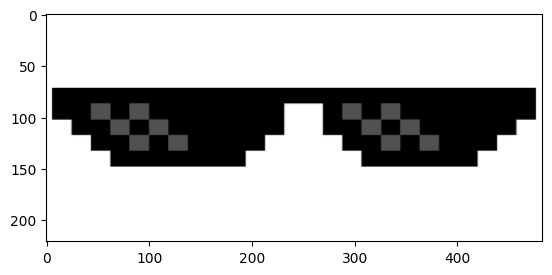

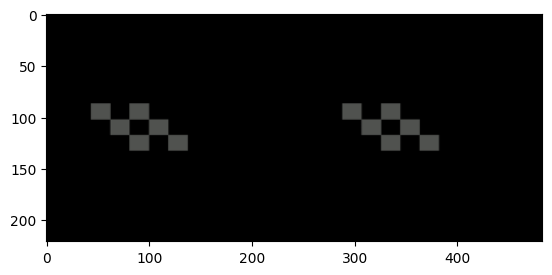

In [4]:
img=cv.imread('Train/glasses.png', cv.IMREAD_UNCHANGED)
img_2=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray=cv.imread("Train/glasses.png",cv.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()
plt.imshow(img_2)
plt.show()

In [6]:
img.shape
img_2.shape

(221, 483, 3)

In [ ]:
cv.imshow("MUNNA",img)
cv.waitKey(0) # wait till given time to destroy the window if 0 then wait till infinite
cv.destroyAllWindows()

In [ ]:
cv.imshow("MUNNA",img_gray)
cv.waitKey(0) # wait till given time to destroy the window if 0 then wait till infinite
cv.destroyAllWindows()

In [10]:
import cv2
import os



# Path to the Haar cascade XML file
cascade_path = 'hfa.xml'

# Load the cascade classifier
fc = cv2.CascadeClassifier(cascade_path)

# Check if the cascade classifier loaded correctly
if fc.empty():
    raise ValueError("Failed to load cascade classifier. Check the path and the file.")

# Open the default camera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        continue

    # Convert the frame to grayscale
    gr_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = fc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5)

    # Display the resulting fram
    cv2.imshow("Video Frame", frame)
    # cv2.imshow("Gray Frame", gr_fr)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np



# Path to the Haar cascade XML file
cascade_path = 'hfa.xml'

# Load the cascade classifier
fc = cv2.CascadeClassifier(cascade_path)

# Check if the cascade classifier loaded correctly
if fc.empty():
    raise ValueError("Failed to load cascade classifier. Check the path and the file.")

# Open the default camera
cap = cv2.VideoCapture(0)

skip=0
data=[]
data_path="./data/"
name=input("Enter Your Name: ")
while True:
    ret, frame = cap.read()

    if not ret:
        continue

    # Convert the frame to grayscale
    gr_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = fc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)
    faces=sorted(faces,key=lambda f:f[2]*f[3],reverse=True)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5)

    if(len(faces)>0):
        x,y,w,h=faces[0]
        face=frame[y-10:y+10+h,x-10:x+10+w,:]
        if face.size == 0:  # Check if the face region is empty
            continue
        face=cv2.resize(face,(100,100))

    skip+=1;
    if(skip%10==0):
        data.append(face)

    # Display the resulting fram
    cv2.imshow("Video Frame", frame)
    cv2.imshow("Face",face)
    # cv2.imshow("Gray Frame", gr_fr)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

np_face=np.asarray(data)
np_face.reshape(np_face.shape[0],-1)
np.save(data_path+name+".npy",np_face)

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


Enter Your Name:  Anurag


In [23]:
ord('q') & 255

113

In [17]:
ord('q')

113

In [36]:
data

[array([[[145, 157, 155],
         [145, 157, 156],
         [145, 156, 157],
         ...,
         [ 44,  52,  56],
         [ 47,  55,  58],
         [ 52,  59,  63]],
 
        [[145, 158, 156],
         [145, 158, 157],
         [145, 158, 158],
         ...,
         [ 42,  51,  53],
         [ 44,  52,  56],
         [ 48,  56,  60]],
 
        [[143, 157, 155],
         [144, 158, 156],
         [146, 160, 159],
         ...,
         [ 41,  49,  52],
         [ 42,  51,  54],
         [ 45,  53,  57]],
 
        ...,
 
        [[ 39,  31,  34],
         [ 38,  29,  33],
         [ 37,  29,  33],
         ...,
         [ 47,  40,  41],
         [ 47,  40,  42],
         [ 48,  40,  42]],
 
        [[ 40,  30,  34],
         [ 39,  29,  33],
         [ 38,  29,  33],
         ...,
         [ 47,  39,  42],
         [ 46,  38,  41],
         [ 47,  39,  41]],
 
        [[ 41,  30,  34],
         [ 39,  29,  33],
         [ 39,  29,  33],
         ...,
         [ 47,  39,  42],
  

In [37]:
len(data)

4

In [2]:
from sklearn.neighbors import KNeighborsClassifier as KC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import cv2
import numpy as np
import os




skip=0
data=[]
data_path="./data/"
label=[]
class_id=0
name={} #maping label with name

for fx in (os.listdir(data_path)):
    if fx.endswith(".npy"):
        n,_=fx.split(".")
        name[class_id]=n
        dt=np.load(data_path+fx)
        data.append(dt)
        target=class_id*np.ones(dt.shape[0],)
        label.append(target)
        class_id+=1

face_data=np.concatenate(data,axis=0)
face_data=face_data.reshape(face_data.shape[0],-1)
face_label=np.concatenate(label,axis=0).reshape(face_data.shape[0],)

In [4]:
face_label.shape

(121,)

In [5]:
name

{0: 'Saurabh', 1: 'Garima', 2: 'Anurag'}

In [6]:

# Path to the Haar cascade XML file
cascade_path = 'hfa.xml'

# Load the cascade classifier
fc = cv2.CascadeClassifier(cascade_path)

# Check if the cascade classifier loaded correctly
if fc.empty():
    raise ValueError("Failed to load cascade classifier. Check the path and the file.")

cap = cv2.VideoCapture(0)

k=KC(5)
k.fit(face_data,face_label)
while True:
    ret, frame = cap.read()

    if not ret:
        continue

    # Convert the frame to grayscale
    gr_fr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = fc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)
    faces=sorted(faces,key=lambda f:f[2]*f[3],reverse=True)

    # Draw rectangles around detected faces
    for fce in faces:
        x,y,w,h=fce
        face=frame[y-10:y+10+h,x-10:x+10+w,:]
        if face.size == 0:  # Check if the face region is empty
            continue
        face=cv2.resize(face,(100,100))
        face = face.flatten().reshape(1, -1)
        result=k.predict(face)
        cv2.putText(frame, name[result[0]], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5)
        
        
    cv2.imshow("Video Frame", frame)  

    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# np_face=np.asarray(data)
# np_face.reshape(len(data),-1)
# np.save(data_path+name+".npy",np_face)

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()


In [5]:
import cv2 as cv
import os

# Path to the Haar cascade XML file
cascade_path = 'Train/third-party/frontalEyes35x16.xml'

cas_path= 'Train/third-party/Nose18x15.xml'

# Load the cascade classifier
fc = cv.CascadeClassifier(cascade_path)
nc = cv.CascadeClassifier(cas_path)
# Check if the cascade classifier loaded correctly
if fc.empty():
    raise ValueError("Failed to load cascade classifier. Check the path and the file.")

# Open the default camera
cap = cv.VideoCapture(0)
fil = cv.imread('Train/glasses.png', cv.IMREAD_UNCHANGED)
fil1 = cv.imread('Train/mustache.png', cv.IMREAD_UNCHANGED)

while True:
    ret, frame = cap.read()

    if not ret:
        continue

    # Convert the frame to grayscale
    gr_fr = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    eyes = fc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)
    ns = nc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)

    # Draw rectangles around detected faces
    for (x, y, w, h) in eyes:
        roi = frame[y:y+h, x:x+w]

        # Resize the filter to fit the detected eye region
        fil_resized = cv.resize(fil, (w, h), interpolation=cv.INTER_AREA)

        # Split the filter into its color and alpha channels
        if fil_resized.shape[2] == 4:
            fil_color = fil_resized[:, :, :3]
            mask = fil_resized[:, :, 3]
        else:
            fil_color = fil_resized
            mask = cv.cvtColor(fil_resized, cv.COLOR_BGR2GRAY)

        # Create the inverse mask
        maskinv = cv.bitwise_not(mask)

        # Ensure ROI has 3 channels
        roiB = cv.bitwise_and(roi, roi, mask=maskinv)
        filB = cv.bitwise_and(fil_color, fil_color, mask=mask)

        # Combine the ROI with the filter
        roi_combined = cv.add(roiB, filB)
        frame[y:y+h, x:x+w] = roi_combined
    for (x, y, w, h) in ns:
        roi = frame[y+h-20:y+h+15, x-10:x+w+10]
        # cv.rectangle(frame, (x, y+h-20), (x + w, y + h), (255, 0, 0), 5)
        # Resize the filter to fit the detected eye region
        fil_resized = cv.resize(fil1, (w+20, 35), interpolation=cv.INTER_AREA)

        # Split the filter into its color and alpha channels
        if fil_resized.shape[2] == 4:
            fil_color = fil_resized[:, :, :3]
            mask = fil_resized[:, :, 3]
        else:
            fil_colorSearch-Trend-analysis = fil_resized
            mask = cv.cvtColor(fil_resized, cv.COLOR_BGR2GRAY)

        # Create the inverse mask
        maskinv = cv.bitwise_not(mask)

        # Ensure ROI has 3 channels
        roiB = cv.bitwise_and(roi, roi, mask=maskinv)
        filB = cv.bitwise_and(fil_color, fil_color, mask=mask)

        # Combine the ROI with the filter
        roi_combined = cv.add(roiB, filB)
        frame[y+h-20:y+h+15, x-10:x+w+10] = roi_combined

    # Display the resulting frame
    cv.imshow("Video Frame", frame)
    # cv.imshow("Gray Frame", gr_fr)

    # Break the loop if 'q' is pressed
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy all windows
cap.release()
cv.destroyAllWindows()


In [5]:
import cv2 as cv
cv.bitwise_and?

Docstring:
bitwise_and(src1, src2[, dst[, mask]]) -> dst
.   @brief computes bitwise conjunction of the two arrays (dst = src1 & src2)
.   Calculates the per-element bit-wise conjunction of two arrays or an
.   array and a scalar.
.   
.   The function cv::bitwise_and calculates the per-element bit-wise logical conjunction for:
.   *   Two arrays when src1 and src2 have the same size:
.       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
.   *   An array and a scalar when src2 is constructed from Scalar or has
.       the same number of elements as `src1.channels()`:
.       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} \quad \texttt{if mask} (I) \ne0\f]
.   *   A scalar and an array when src1 is constructed from Scalar or has
.       the same number of elements as `src2.channels()`:
.       \f[\texttt{dst} (I) =  \texttt{src1}  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
.   In case of floating-po

In [12]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

# Path to the Haar cascade XML file
cascade_path = 'Train/third-party/frontalEyes35x16.xml'

cas_path= 'Train/third-party/Nose18x15.xml'

# Load the cascade classifier
fc = cv.CascadeClassifier(cascade_path)
nc = cv.CascadeClassifier(cas_path)
# Check if the cascade classifier loaded correctly
if fc.empty():
    raise ValueError("Failed to load cascade classifier. Check the path and the file.")

frame=cv.imread('Train/Jamie_Before.jpg')
gr_fr = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

# Detect faces in the grayscale frame
eyes = fc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)
ns = nc.detectMultiScale(gr_fr, scaleFactor=1.05, minNeighbors=5)

fil = cv.imread('Train/glasses.png', cv.IMREAD_UNCHANGED)
fil1 = cv.imread('Train/mustache.png', cv.IMREAD_UNCHANGED)



# Draw rectangles around detected faces
for (x, y, w, h) in eyes:
    roi = frame[y:y+h, x:x+w]

    # Resize the filter to fit the detected eye region
    fil_resized = cv.resize(fil, (w, h), interpolation=cv.INTER_AREA)

    # Split the filter into its color and alpha channels
    if fil_resized.shape[2] == 4:
        fil_color = fil_resized[:, :, :3]
        mask = fil_resized[:, :, 3]
    else:
        fil_color = fil_resized
        mask = cv.cvtColor(fil_resized, cv.COLOR_BGR2GRAY)

    # Create the inverse mask
    maskinv = cv.bitwise_not(mask)

    # Ensure ROI has 3 channels
    roiB = cv.bitwise_and(roi, roi, mask=maskinv)
    filB = cv.bitwise_and(fil_color, fil_color, mask=mask)

    # Combine the ROI with the filter
    roi_combined = cv.add(roiB, filB)
    frame[y:y+h, x:x+w] = roi_combined

ns=sorted(ns,key=lambda f:f[2]*f[3],reverse=True)
x,y,w,h=ns[0]
roi = frame[y+h-20:y+h+15, x-10:x+w+10]
# cv.rectangle(frame, (x, y+h-20), (x + w, y + h), (255, 0, 0), 5)
# Resize the filter to fit the detected eye region
fil_resized = cv.resize(fil1, (w+20, 35), interpolation=cv.INTER_AREA)

# Split the filter into its color and alpha channels
if fil_resized.shape[2] == 4:
    fil_color = fil_resized[:, :, :3]
    mask = fil_resized[:, :, 3]
else:
    fil_color = fil_resized
    mask = cv.cvtColor(fil_resized, cv.COLOR_BGR2GRAY)

# Create the inverse mask
maskinv = cv.bitwise_not(mask)

# Ensure ROI has 3 channels
roiB = cv.bitwise_and(roi, roi, mask=maskinv)
filB = cv.bitwise_and(fil_color, fil_color, mask=mask)

# Combine the ROI with the filter
roi_combined = cv.add(roiB, filB)
frame[y+h-20:y+h+15, x-10:x+w+10] = roi_combined


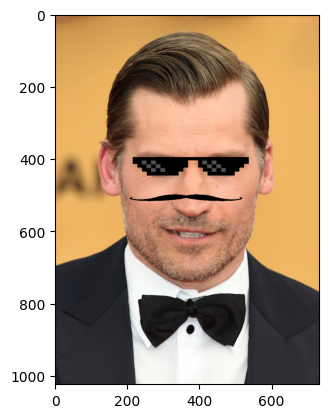

In [13]:
img_2=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
plt.imshow(img_2)
plt.show()
# plt.imshow(img_2)
# plt.show()